IMPORTING THE REQUIRED 

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

LOADING AND SPLITTING THE DATA 

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train.ndim)

4


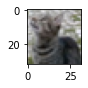

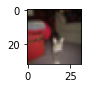

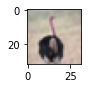

In [ ]:
for i in range(333,336):
    #plt.subplot(120+ 1 + i) 
    plt.figure(figsize=(1,1))
    img = X_train[i]
    plt.imshow(img)
    plt.show()

PREPROCESSING THE DATA 

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape0)

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
        
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 541s 1s/step - loss: 1.8540 - accuracy: 0.3056
Epoch 2/20
391/391 [==============================] - 521s 1s/step - loss: 1.1710 - accuracy: 0.5817
Epoch 3/20
391/391 [==============================] - 529s 1s/step - loss: 0.9291 - accuracy: 0.6723
Epoch 4/20
391/391 [==============================] - 527s 1s/step - loss: 0.8036 - accuracy: 0.7189
Epoch 5/20
391/391 [==============================] - 520s 1s/step - loss: 0.7173 - accuracy: 0.7494
Epoch 6/20
391/391 [==============================] - 519s 1s/step - loss: 0.6503 - accuracy: 0.7727
Epoch 7/20
391/391 [==============================] - 520s 1s/step - loss: 0.5978 - accuracy: 0.7894
Epoch 8/20
391/391 [==============================] - 523s 1s/step - loss: 0.5489 - accuracy: 0.8089
Epoch 9/20
391/391 [==============================] - 519s 1s/step - loss: 0.5086 - accuracy: 0.8188
Epoch 10/20
391/391 [==============================] - 518s 1s/step - loss: 0.4700 - accura

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 30s 92ms/step - loss: 0.6935 - accuracy: 0.7893


[0.6935018301010132, 0.7893000245094299]

PREDICTING 

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 515ms/step


In [ ]:
print (predictions)

[[2.76122464e-05 1.14560571e-07 1.19693147e-03 4.58390079e-03
  8.09125543e-01 1.86914373e-02 1.25614561e-05 1.66352227e-01
  8.02314844e-06 1.70283158e-06]
 [2.36768989e-04 1.32416215e-04 2.63374690e-02 2.22734496e-01
  1.42566105e-02 6.85184062e-01 1.67339239e-02 3.31110582e-02
  3.26858688e-04 9.46367159e-04]
 [1.86067936e-07 9.18895680e-08 1.37969502e-04 1.03746331e-03
  8.42386180e-06 3.80292404e-05 9.98776495e-01 5.70283532e-07
  3.48473066e-07 4.27304343e-07]
 [8.69036825e-08 6.34236885e-09 1.89369403e-05 9.58889425e-01
  1.30429713e-03 1.48764614e-03 3.82946804e-02 4.59130479e-06
  9.01229953e-08 3.25027685e-07]
 [5.14981981e-12 9.99990702e-01 1.67197862e-19 4.58076700e-18
  2.16066024e-24 1.69155648e-21 1.25023691e-16 3.60959148e-22
  6.78962789e-11 9.31601880e-06]
 [4.64989716e-06 9.99869466e-01 1.54416135e-09 1.21875354e-09
  4.70947543e-12 2.59540056e-10 8.23087163e-08 3.03786842e-14
  1.82509066e-05 1.07524946e-04]
 [1.51781654e-02 3.32774071e-04 2.45542056e-03 8.64200473e

In [ ]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0000001
1.0
0.99999994
0.9999999
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION 

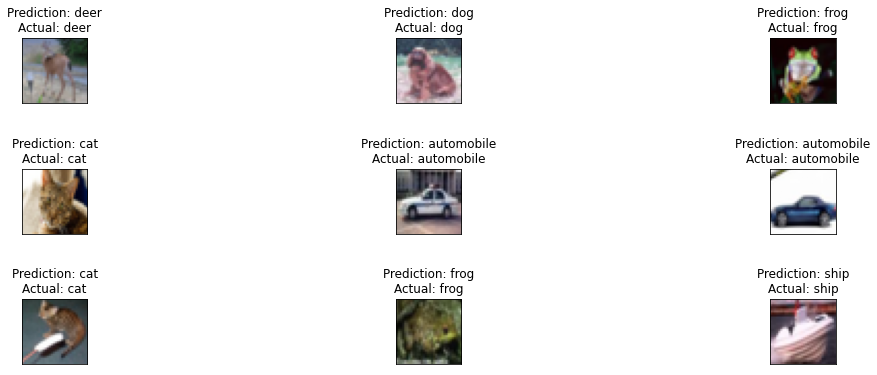

In [ ]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()